<a href="https://colab.research.google.com/github/Hibath-K/Python-Projects/blob/main/Avocado_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poject: Avocado






##Insights to find

1. does the price have an influence on the volume?
2. which areas consumed avocados the most from 2015 to 2021?
3. the plu4770 being the biggest Hass variety, is it also the one consumed the most?
4. is the trend in the most consuming city a mirror image of the general trend in the U.S?



Importing libraries 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing Data

In [5]:
df = pd.read_csv("/avocado_cleaned.csv")

In [6]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,01-04-15,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,01-04-15,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,01-11-15,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
3,01-11-15,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
4,1/18/2015,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany


Data Processing

In [7]:
df.shape

(41025, 13)

In [13]:
df.isna().sum()

Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41025 entries, 0 to 41024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          41025 non-null  object 
 1   AveragePrice  41025 non-null  float64
 2   TotalVolume   41025 non-null  float64
 3   plu4046       41025 non-null  float64
 4   plu4225       41025 non-null  float64
 5   plu4770       41025 non-null  float64
 6   TotalBags     41025 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          41025 non-null  object 
 11  year          41025 non-null  int64  
 12  region        41025 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 4.1+ MB


changing types

In [9]:
df = df.astype({'AveragePrice':'float'})
df['Date']= pd.to_datetime(df['Date'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41025 entries, 0 to 41024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          41025 non-null  datetime64[ns]
 1   AveragePrice  41025 non-null  float64       
 2   TotalVolume   41025 non-null  float64       
 3   plu4046       41025 non-null  float64       
 4   plu4225       41025 non-null  float64       
 5   plu4770       41025 non-null  float64       
 6   TotalBags     41025 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          41025 non-null  object        
 11  year          41025 non-null  int64         
 12  region        41025 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 4.1+ MB


In [98]:
df.loc[df['region']=='LosAngeles']

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,year_month
16292,2015-01-04,0.850000,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles,2015-01
16293,2015-01-04,1.250000,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,LosAngeles,2015-01
16294,2015-01-11,0.850000,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,LosAngeles,2015-01
16295,2015-01-11,1.080000,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,LosAngeles,2015-01
16296,2015-01-18,0.890000,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,conventional,2015,LosAngeles,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,2021-11-14,1.771233,158707.63,4514.77,2266.42,0.00,79641.59,67540.34,2830.80,0.00,Organic,2021,LosAngeles,2021-11
17010,2021-11-21,1.312616,2473470.43,510489.02,37796.99,79967.68,697132.12,623691.47,318.15,13726.70,Conventional,2021,LosAngeles,2021-11
17011,2021-11-21,1.872886,122884.26,5640.49,2198.21,15.42,41343.46,28530.31,2919.00,0.00,Organic,2021,LosAngeles,2021-11
17012,2021-11-28,1.315276,2353452.38,620096.46,32111.10,76710.11,615884.93,545196.15,217.35,13744.91,Conventional,2021,LosAngeles,2021-11


In [97]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,year_month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,2015-01
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,2015-01
2,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,2015-01
3,2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,2015-01
4,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,2015-01


Data Analysis

First, let's see the general volume sold as well as the sales for each variety throughout the years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


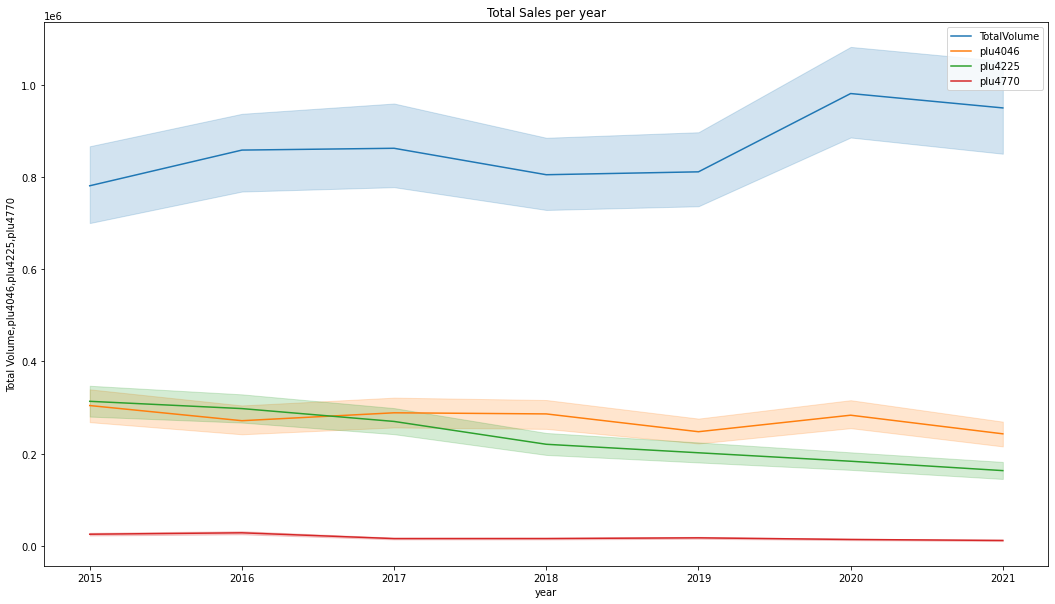

In [43]:
plt.figure(figsize=(18,10))

plt.title("Total Sales per year")
plt.ylabel('Total Volume,plu4046,plu4225,plu4770')
sns.lineplot(x="year", y="TotalVolume",label= "TotalVolume", data=df);
sns.lineplot(df.year, df.plu4046,label= "plu4046",data=df)
sns.lineplot(df.year, df.plu4225,label= "plu4225",data=df)
sns.lineplot(df.year, df.plu4770,label= "plu4770",data=df)

It seems that the PLU4225(Hass big size) and PLU4046 (Hass small size) are chasing each other until 2018 when plu 4046 (the small variety of Hass avocado) became the most sold

Let’s have a proper look at each variety of avocados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


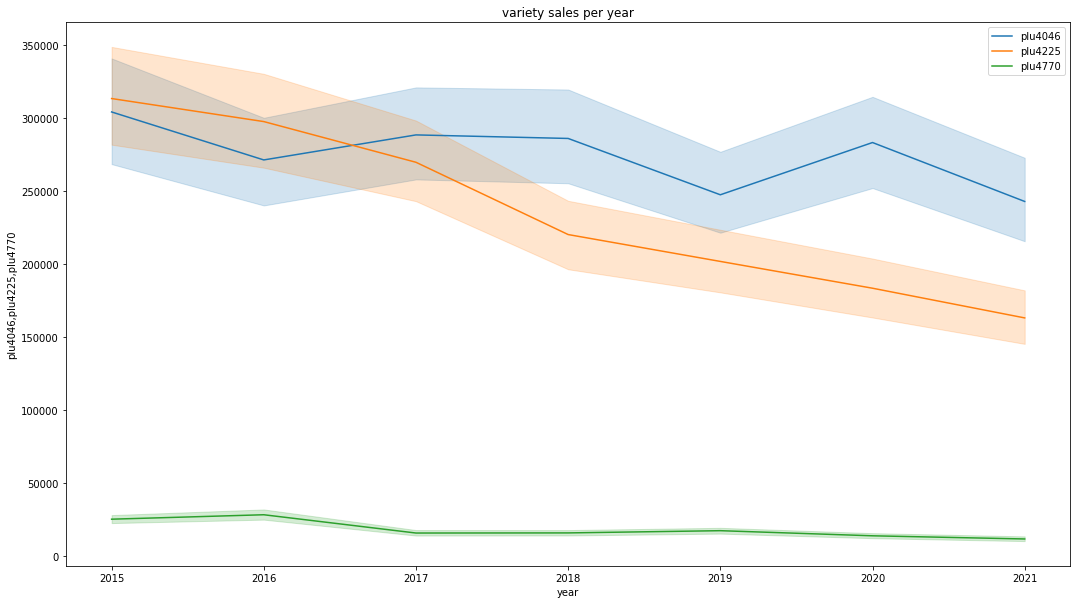

In [45]:
plt.figure(figsize=(18,10))

plt.title("variety sales per year")
plt.ylabel('plu4046,plu4225,plu4770')
sns.lineplot(df.year, df.plu4046,label= "plu4046",data=df)
sns.lineplot(df.year, df.plu4225,label= "plu4225",data=df)
sns.lineplot(df.year, df.plu4770,label= "plu4770",data=df)

Next we have data moxed with city and region we seperating that into 2 seperate column. then we will compare all that. 

In [57]:
#df['region_n']=df.loc[df['region'].isin('West','California','SouthCentral','Northeast','Southeast','GreatLakes','Midsouth','Plains')]
# isin only possible putting two arguments

In [83]:
region = ['West','California','SouthCentral','Northeast','Southeast','GreatLakes','Midsouth','Plains']
df2 = df[df.region.isin(region)]

df2.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,year_month
4740,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,2015-01
4741,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California,2015-01
4742,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California,2015-01
4743,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California,2015-01
4744,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California,2015-01


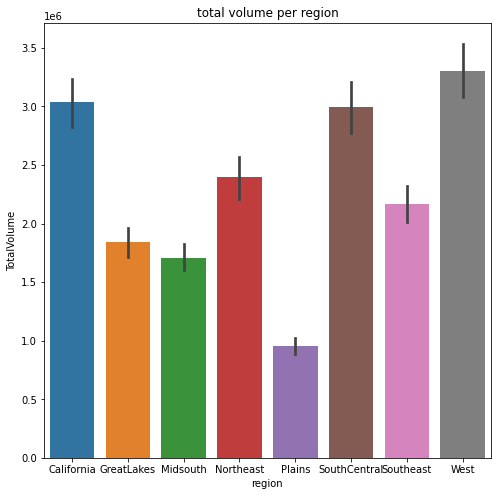

In [84]:
plt.figure(figsize=(8,8))

plt.title("total volume per region")

sns.barplot(x="region",y="TotalVolume",data= df2)

plt.show()

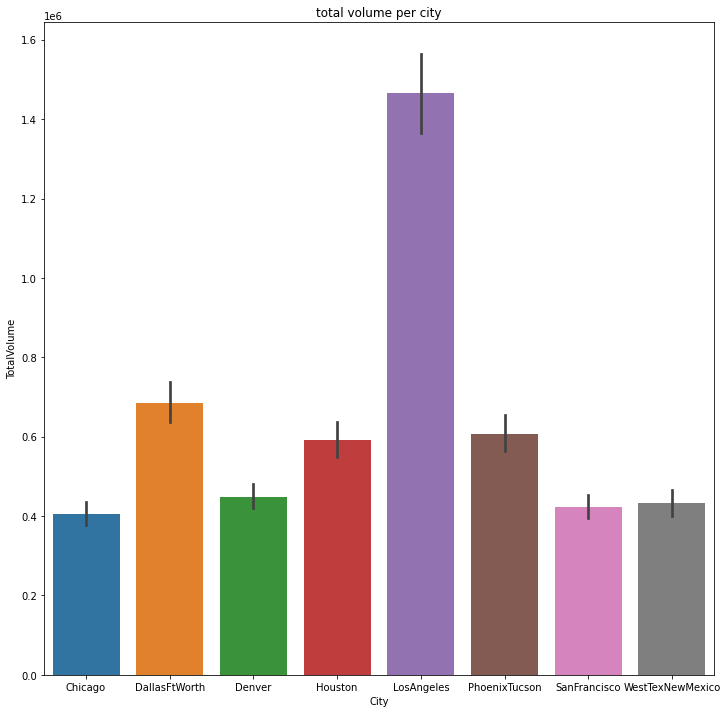

In [150]:
city  = ['LosAngeles','Newyork','DallasFtWorth','PhoenixTucson','Houston','Denver','BaltmoreWashington','WestTexNewMexico','SanFrancisco','Chicago']
ax =plt.figure(figsize=(12,12))
df3 = df[df.region.isin(city)]

ax = sns.barplot(x="region",y="TotalVolume",data= df3)
ax.set(title = "total volume per city", xlabel='City')


plt.show()

unit sold LosAngels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

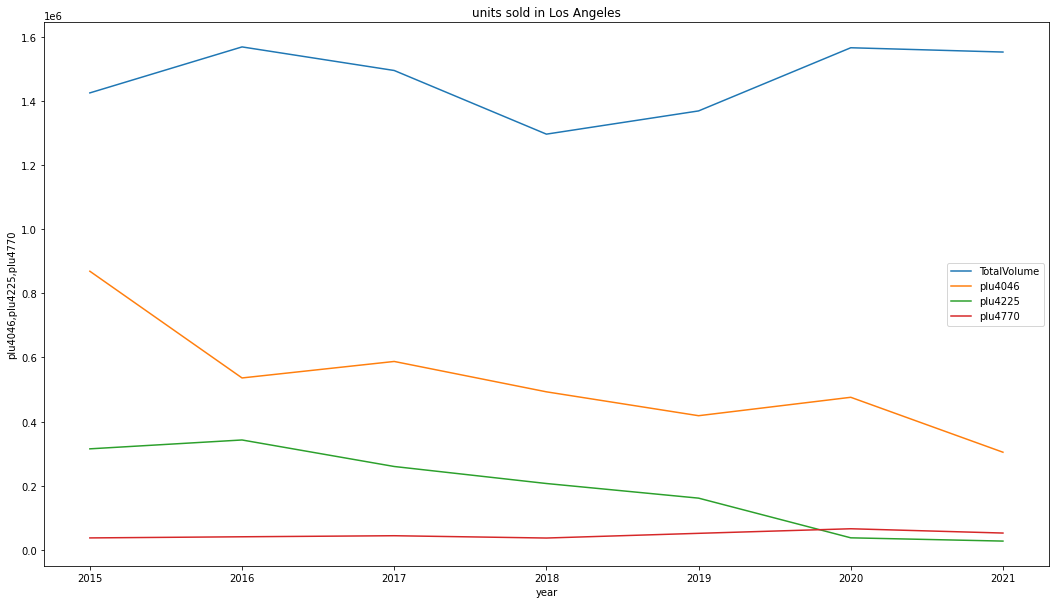

In [109]:
x = df.loc[df['region']=='LosAngeles']


plt.figure(figsize=(18,10))

plt.title("units sold in Los Angeles")
plt.ylabel('plu4046,plu4225,plu4770')
sns.lineplot(x.year, x.TotalVolume, ci = None, label= "TotalVolume", data=x)
sns.lineplot(x.year, x.plu4046,ci = None,label= "plu4046",data=x)
sns.lineplot(x.year, x.plu4225,ci = None,label= "plu4225",data=x)
sns.lineplot(x.year, x.plu4770,ci = None,label= "plu4770",data=x)

Average price evolution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


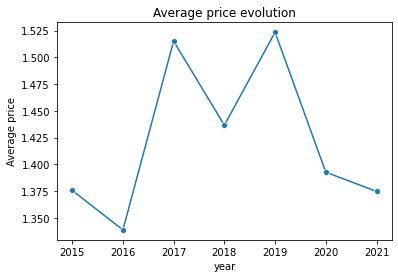

In [110]:
plt.title("Average price evolution")
plt.ylabel('Average price')
sns.lineplot(df.year, df.AveragePrice, ci = None , marker ='o', data=df)


Units Sales Evolution

In [116]:
import matplotlib.ticker as ticker
@ticker.FuncFormatter
def billion_formatter(x, pos):
  return "%.1f B" %(x/1E9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


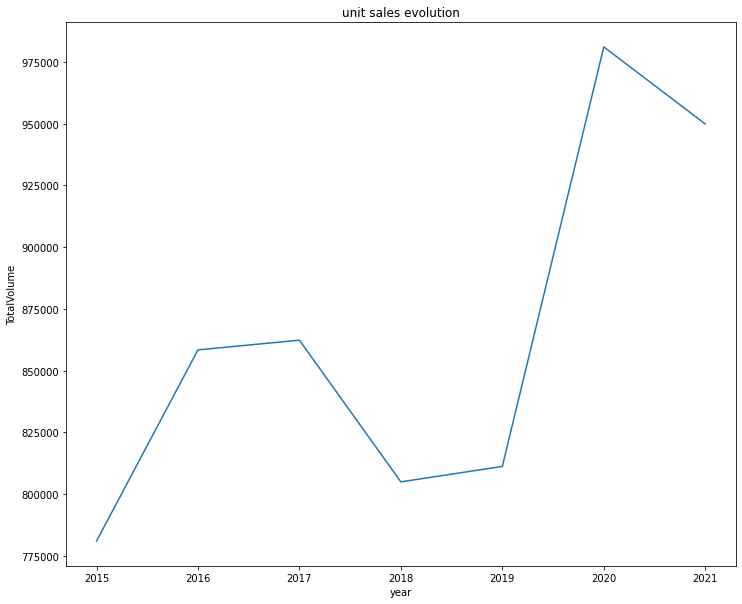

In [119]:
plt.figure(figsize=(12,10))
plt.title("unit sales evolution")

ax.yaxis.set_major_formatter(billion_formatter)
sns.lineplot(df.year, df.TotalVolume, ci = None ,data=df)

The average price by region

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


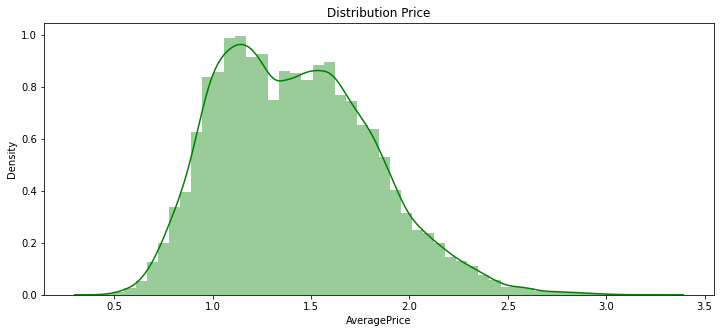

In [144]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'g')

Next we have data moxed with city and region we seperating that into 2 seperate column. then we will compare price by region and city. 

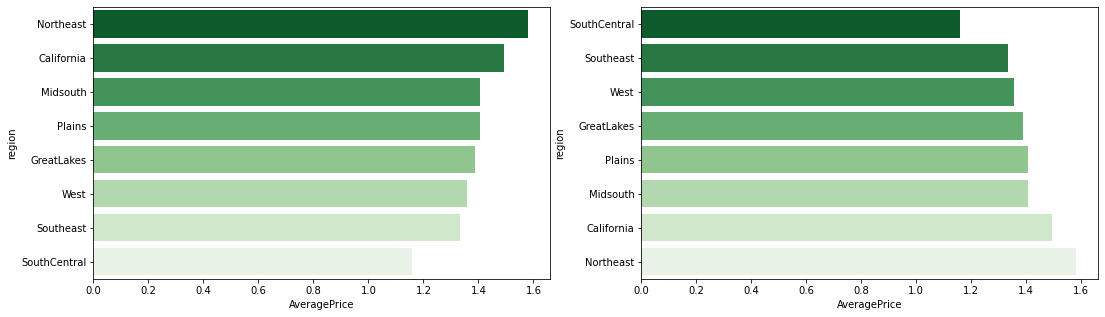

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = df2.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = df2, order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = df2, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

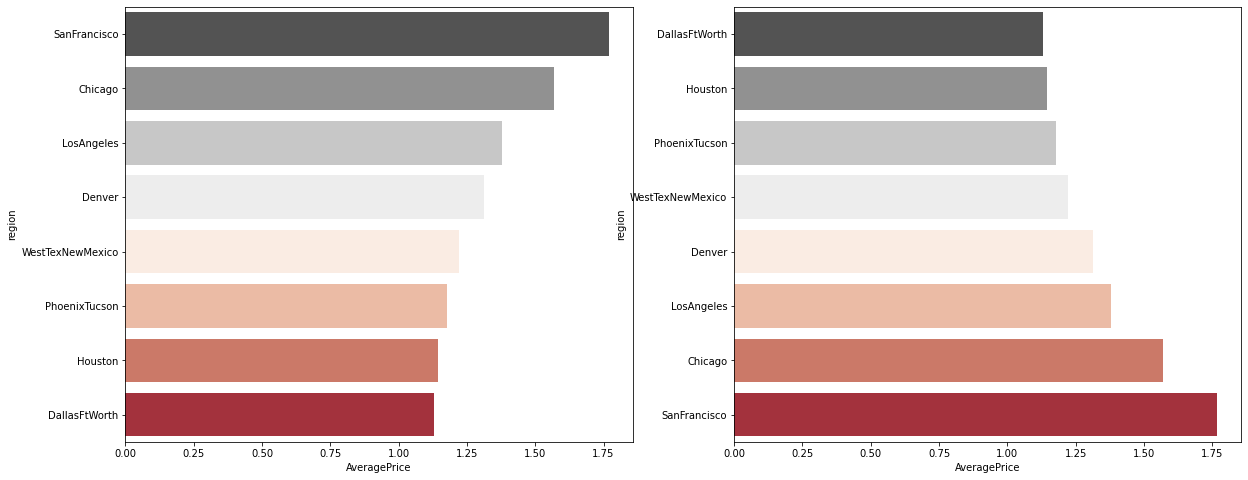

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

cityP = df3.groupby('region')['AveragePrice'].mean()    # city price = cityP

expensive = cityP.sort_values(ascending = False).iloc[:10]
cheap = cityP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = df3, order=expensive.index, ci=None, palette='RdGy_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = df3, order=cheap.index, ci=None, palette='RdGy_r', ax=ax[1])

plt.show()

average price by type

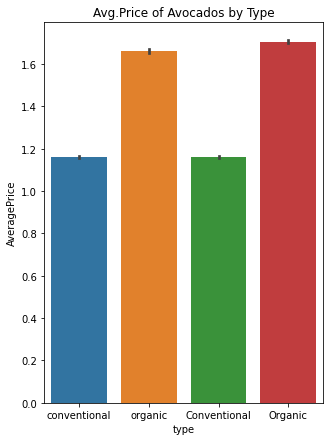

In [37]:
plt.figure(figsize=(5,7))

plt.title("Avg.Price of Avocados by Type")

sns.barplot(x="type",y="AveragePrice",data= df)

plt.show()

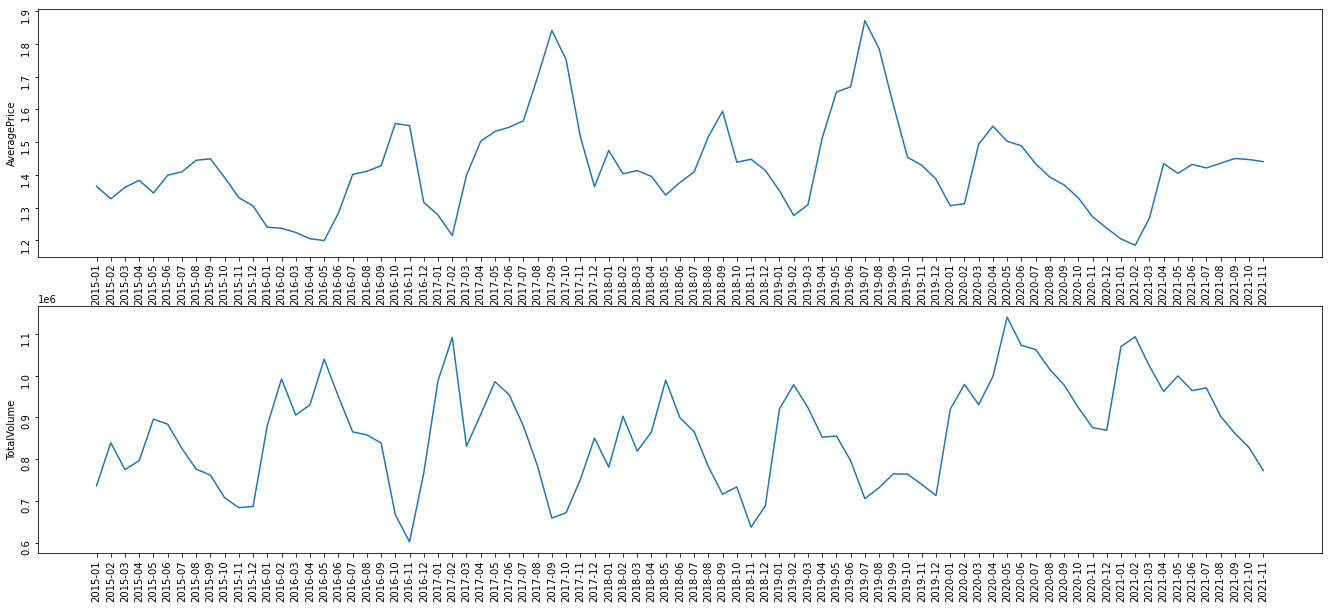

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(23,10))

df['year_month'] = df['Date'].dt.to_period('M')
grouped = df.groupby('year_month')[['AveragePrice', 'TotalVolume']].mean()

ax[0].plot(grouped.index.astype(str), grouped['AveragePrice'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('AveragePrice')


ax[1].plot(grouped.index.astype(str), grouped['TotalVolume'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('TotalVolume')

plt.show()